# Import data from google drive to collab environment



In [1]:
from google.colab import files, drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import glob


dataset_list=[]

for i in ['pos', 'neg']: 
  given_data = glob.glob('/content/drive/My Drive/Review_Lab3/'+i)
  dataset_list.append(given_data)

In [3]:
print(dataset_list)

[['/content/drive/My Drive/Review_Lab3/pos'], ['/content/drive/My Drive/Review_Lab3/neg']]


In [4]:
count=0
pos_fnames=[]
neg_fnames=[]
pos_fnames_final=[]
neg_fnames_final=[]
for i in dataset_list: 
  if count==0:
    file_names = glob.glob(i[0]+'/*.txt')
    pos_fnames.append(file_names)
    count+=1
  if count==1: 
    file_names = glob.glob(i[0]+'/*.txt')
    neg_fnames.append(file_names)

count=0
for fnames in pos_fnames[0]:
  if count<500:  # change has to be made 
    pos_fnames_final.append(fnames)
    count+=1
  else: 
    break

count=0
for fnames in neg_fnames[0]:
  if count<500: #change has to be made
    neg_fnames_final.append(fnames)
    count+=1
  else: 
    break

print(len(pos_fnames_final))
print(len(neg_fnames_final))

500
500


# Store the data as a pandas df

In [5]:
empty_df = pd.DataFrame(columns = ['given_text_data']) #define empty pandas dataframe
# instances from pos folder 
for path_txt_file in pos_fnames_final: 
  with open(path_txt_file) as f:
    text = f.read().replace("\n", "")
    
  empty_df = empty_df.append({'given_text_data': text}, ignore_index=True)

empty_df['label']='pos'

#instances from neg folder 
for path_txt_file in neg_fnames_final: 
  with open(path_txt_file) as f:
    text = f.read().replace("\n", "")
    
  empty_df = empty_df.append({'given_text_data': text, 'label': 'neg'}, ignore_index=True)

# Binary classification problem, hence the labels

In [6]:
#pos label as 1 and neg label as 0
sentiment_cat = {'pos':1, 'neg':0}
empty_df['Class']=empty_df['label'].str.strip().map(sentiment_cat)

text_data = empty_df.given_text_data.values
class_data = empty_df.Class.values

labels = []
for elem in class_data: 
  if elem==1: 
    labels.append([1,0])
  else: 
    labels.append([0,1])
print(labels)

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0],

# Feature extraction using TF-IDF Vectorizer 

In [7]:
#TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=200) #200 top words 
instances = vectorizer.fit_transform(text_data)
X = instances.toarray()
Y = np.array(labels)

print(X.shape,',', Y.shape)
print(vectorizer.vocabulary_) 

(1000, 200) , (1000, 2)
{'films': 57, 'comic': 29, 'world': 195, 'really': 145, 'like': 100, 'new': 123, 'series': 161, 'say': 150, 'michael': 114, 'look': 105, 'little': 102, 'long': 104, 'don': 44, 'film': 56, 'thing': 173, 'getting': 66, 'better': 16, 'set': 162, 'course': 30, 'end': 46, 'place': 134, 'turns': 182, 'case': 21, 'isn': 90, 'think': 175, 'interesting': 89, 'good': 71, 'job': 93, 'funny': 63, 'watch': 188, 'point': 140, 'ending': 47, 'star': 168, 'll': 103, 'make': 109, 'sense': 159, 'dark': 31, 'did': 38, 'times': 177, 'music': 122, 'scenes': 152, 'black': 19, 'love': 108, 'original': 127, 'acting': 1, 'performance': 130, 'great': 73, 'big': 17, 'time': 176, 'actually': 5, 'half': 76, 'bad': 10, 'movie': 120, 'comes': 28, 'high': 81, 'school': 153, 'comedy': 27, 'know': 97, 'plot': 139, 'having': 79, 'hand': 77, 'way': 190, 'run': 149, 'going': 70, 'fact': 50, 'right': 147, 'help': 80, 'does': 42, 'makes': 110, 'play': 135, 'home': 83, 'gets': 65, 'life': 99, 'probably

In [8]:
print(vectorizer.idf_)

[2.72136897 2.48380476 2.32902495 2.55689665 2.41569334 2.277543
 3.67464827 2.49265438 2.15618214 2.46633707 2.35192672 2.5955488
 2.94591015 2.64606459 2.73260505 1.71231065 2.28473727 2.21502264
 2.48380476 2.86532966 3.09657042 2.94591015 2.29928298 1.65300474
 1.78845736 2.93202104 2.29928298 2.48380476 2.19502197 2.91832219
 2.39130188 3.04894237 2.87831686 2.32902495 2.83985058 2.81500458
 2.85250897 2.85250897 2.40749657 2.67764616 2.5857448  1.89503962
 1.70419702 1.96071979 1.98717636 2.68839895 1.99795814 2.64606459
 2.69926863 2.60544987 2.24927256 2.44916927 2.42395785 2.5857448
 2.45771633 3.37615529 1.11193106 1.84264669 2.79076097 2.80280931
 2.93202104 2.79076097 2.45771633 2.44069464 3.08044104 2.24232809
 2.77885606 2.71025775 2.54746261 2.44069464 2.23543151 1.56487435
 2.94591015 1.89503962 2.97428085 2.86532966 2.74396881 2.79076097
 2.48380476 2.5955488  2.42395785 2.57603599 2.5857448  2.51968305
 3.14658084 3.04894237 2.71025775 2.80280931 2.40749657 2.37536529

In [9]:
first_str = (text_data[0])
print((first_str))
string_split_words = (vectorizer.build_tokenizer())
print((string_split_words(first_str)))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don't dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . getting the hughes brothers to direct this seems almost as ludicr

In [10]:
# now the task is that we have 200 sentences -> each sentence might be of varying length and hence we might need PADDING for shorter sentences to be equal to longest 
# within each sentence we now have equal words after padding, so next is to represent each word by the vocabulary size of 200 in our case
# so one sentence, will have "max_len" words, where each word will be represented by a vector of 200 

# first step is to deal with text_data 
review_words_list = []
for review in text_data: 
  list_of_words = string_split_words(review)
  review_words_list.append(list_of_words)

print(len(review_words_list))

1000


# Select only those words from given text data which are present in our vocab
# Convert each doc into same length 

In [11]:
# now we have each review split into words
# now check if the word is present in our vocab of 200 words as defined above while computing TF-IDF
tfidf_vocab = vectorizer.vocabulary_
lengths = []
new_review_words_list = []

for elem in review_words_list: 
  words_considered=[]
  for word in elem: 
    if word in tfidf_vocab: 
      words_considered.append(word)
  lengths.append(len(words_considered))
  new_review_words_list.append(words_considered)    
print((lengths))
longest_review = (max(lengths))

[78, 80, 63, 119, 81, 93, 127, 79, 23, 46, 77, 71, 31, 39, 131, 92, 50, 114, 80, 42, 51, 91, 70, 95, 92, 90, 60, 136, 98, 173, 74, 172, 95, 116, 66, 50, 36, 113, 46, 66, 87, 117, 101, 71, 99, 106, 101, 90, 75, 70, 38, 88, 28, 76, 66, 90, 43, 19, 19, 81, 101, 73, 136, 20, 97, 88, 46, 54, 117, 59, 61, 131, 63, 92, 200, 41, 181, 81, 76, 43, 45, 78, 41, 121, 88, 105, 111, 111, 68, 49, 45, 48, 80, 52, 50, 74, 87, 90, 74, 114, 101, 67, 99, 128, 70, 107, 58, 77, 30, 74, 151, 32, 110, 70, 33, 165, 119, 110, 113, 38, 112, 78, 125, 159, 78, 54, 69, 63, 59, 73, 61, 112, 39, 65, 134, 52, 97, 61, 79, 41, 94, 89, 66, 127, 57, 26, 228, 131, 80, 59, 43, 46, 51, 118, 62, 91, 47, 16, 114, 80, 74, 29, 173, 124, 63, 77, 98, 64, 62, 101, 37, 63, 55, 37, 71, 68, 61, 102, 108, 50, 86, 92, 78, 113, 42, 97, 78, 49, 57, 71, 82, 63, 66, 65, 64, 63, 77, 38, 41, 126, 40, 63, 86, 100, 58, 56, 101, 54, 123, 23, 77, 180, 51, 34, 62, 49, 66, 37, 68, 53, 54, 39, 43, 68, 99, 61, 74, 81, 78, 23, 44, 126, 112, 111, 83, 44

# Create a 3d array which has all docs with same length and each word represented as a vector equal to max_featuers in TF-IDF vocab

In [12]:
# so now the elements with length less than 258 will have to padded with zeros. 
# bottom line is that each sentence has to be of length 258 and each word within has to be of a vector 200

nn_input_box = np.zeros([X.shape[0],longest_review,200])

review_count=0
for elem in new_review_words_list: 
  #padding = longest_review - len(elem) 

  word_count=0
  for word in elem: 
    index = tfidf_vocab[word]
    tfidf_value = X[review_count,index] #note that we have used X here
    nn_input_box[review_count, word_count, index] = tfidf_value #considered post-padding 
    word_count+=1

  review_count+=1

# Train and Validation set loader

In [13]:
# now we have both X and Y ready
# X will now be nn_input_box and Y has been defined above while computing TF-IDF

from sklearn.model_selection import train_test_split

nn_input_box = nn_input_box.astype(np.float32)
Y=Y.astype(np.float32)

X_train,Y_train, X_val, Y_val=train_test_split(nn_input_box, Y, test_size=0.2, random_state=333)
print(X_train.shape,Y_train.shape, X_val.shape, Y_val.shape)

(800, 258, 200) (200, 258, 200) (800, 2) (200, 2)


In [14]:
# time to get train and validation LOADER 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim 
from torch.autograd import Variable
device = torch.device("cpu")

batch_size = 32 

training_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(X_val))
validation_dataset = TensorDataset(torch.from_numpy(Y_train), torch.from_numpy(Y_val))

train_loader = DataLoader(training_dataset, shuffle=True, batch_size = batch_size)
val_loader = DataLoader(validation_dataset, shuffle=True, batch_size = batch_size)

# RNN architecture 

In [15]:
# define the RNN architecture 

from __future__ import unicode_literals, print_function, division


class Model(nn.Module):
  def __init__(self, input_size, output_size, hidden_size, n_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.n_layers = n_layers

    self.rnn = nn.RNN(input_size,hidden_size,n_layers,batch_first=True) # rnn layer
    self.fc1 = nn.Linear(hidden_size,output_size) # rnn output (y_t) --> output (y'_t)
    self.fc2 = nn.Linear(output_size,2) #the output from the last time period ->sentiment prediction

  def forward(self,x, hidden):
    batch_size = x.size()[0]

    hidden = self.init_hidden(batch_size)

    rnn_out,hidden = self.rnn(x,hidden)
    rnn_out = self.fc1(rnn_out)
    last_out = rnn_out[:,-1,:].view(batch_size,-1)
    out = F.softmax(self.fc2(last_out))
    return out,hidden

  def init_hidden(self,batch_size):
    hidden = torch.zeros(self.n_layers, batch_size, self.hidden_size)
    return hidden


model = Model(200,32,256,3) #200 is the vocab size selected above (max_features within TF-IDF)
print(model)

Model(
  (rnn): RNN(200, 256, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)


# Training and Validation 

In [16]:
# the output means that each batch will have 16 instances, with every instance represented by 258 words and each word is a vector of 200
for batch_idx, batch in enumerate(train_loader): 
  inputs,targets = batch[0].to(dtype=torch.float), batch[1].to(dtype=torch.float)
  print(inputs.shape)

torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])
torch.Size([32, 258, 200])


In [21]:
#hyperparameters
epochs = 10
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
  model.to(device)

train_loss_list=[]
val_loss_list=[]

for epoch in range(epochs):
  model.train()

  #initialize h0,c0 (hidden state)
  h = model.init_hidden(batch_size)

  running_loss=0.0

  for batch_idx, batch in enumerate(train_loader): 

    inputs,targets = batch[0].to(device,dtype=torch.float), batch[1].to(device,dtype=torch.float) 

    optimizer.zero_grad()
        
    outputs,h = model(inputs,h)
    loss = criterion(outputs, torch.max(targets,1)[1])
        
    loss.backward()
        
    optimizer.step()
        
    running_loss += loss.item()

  train_loss_list.append(running_loss/(batch_idx+1))


  model.eval()
  val_running_loss = 0.0


  with torch.no_grad():
    for batch_idx_new, batch in enumerate(val_loader): 
      inputs,targets = batch[0].to(device,dtype=torch.float), batch[1].to(device,dtype=torch.float)

      outputs,h = model(inputs,h)

      loss = criterion(outputs, torch.max(targets,1)[1])

      val_running_loss += loss.item()

  val_loss_list.append(val_running_loss/(batch_idx_new+1))

  print('Epoch:{}/{}'.format(epoch+1,epochs), # epoch is the index of epoch
        'Train Loss:{:.5f}'.format(running_loss/(batch_idx+1)),
        'Val Loss:{:.5f}'.format(val_running_loss/(batch_idx_new+1)))
  print('\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:1/10 Train Loss:0.69502 Val Loss:0.69643


Epoch:2/10 Train Loss:0.69529 Val Loss:0.69318


Epoch:3/10 Train Loss:0.69350 Val Loss:0.69327


Epoch:4/10 Train Loss:0.69340 Val Loss:0.69313


Epoch:5/10 Train Loss:0.69330 Val Loss:0.69316


Epoch:6/10 Train Loss:0.69353 Val Loss:0.69351


Epoch:7/10 Train Loss:0.69325 Val Loss:0.69316


Epoch:8/10 Train Loss:0.69337 Val Loss:0.69294


Epoch:9/10 Train Loss:0.69326 Val Loss:0.69304


Epoch:10/10 Train Loss:0.69357 Val Loss:0.69312




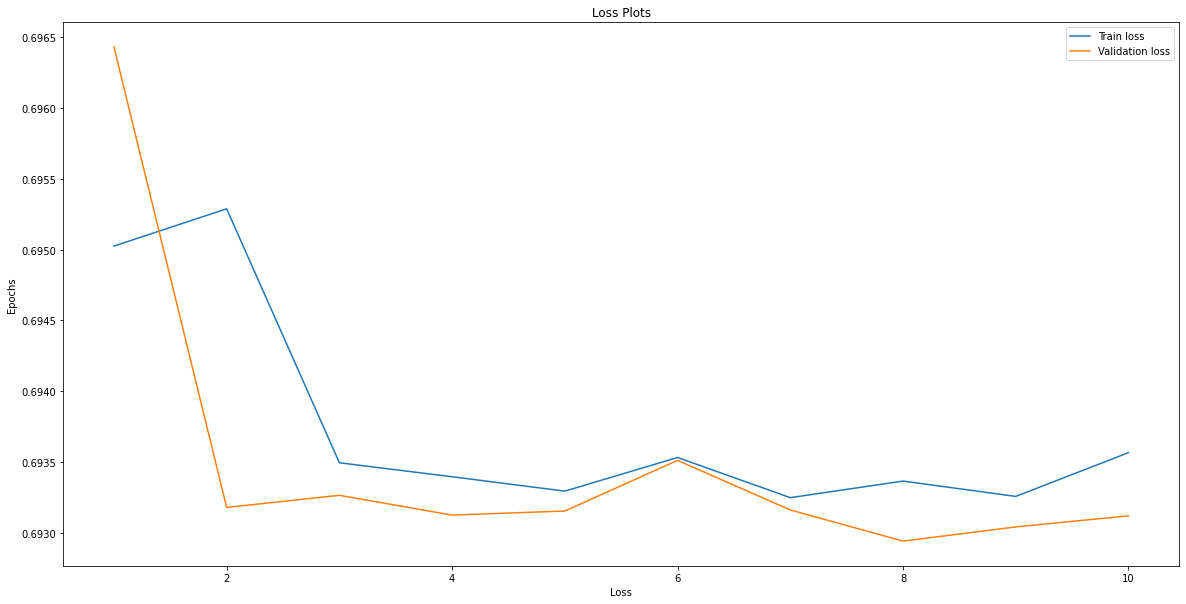

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, epochs+1), train_loss_list, label="Train loss")
plt.plot(np.arange(1, epochs+1), val_loss_list, label="Validation loss")
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()